### カリキュラム - 【AIコース】教師なし学習 Feature Selection 3 embedded method

##### L1 Norm
実装条件  
dataset: ワインのデータ  
feature: 13次元  
label: 1次元(3種類のワイン)  
task: Classification（13個の特徴量からワインの種類に分類）  
model: LogisticRegression  
feature selection: embedded method: L1 normalization  
評価指標: 得られた解の各特徴量の大きさ   
 （大きい方が有用な特徴量）  
データを読み込みます。  

In [4]:
# wineデータの読み込み
import pandas as pd
from sklearn.model_selection import train_test_split

df_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header = None)
df_wine.columns = ["Class label","Alchol","Malic acid","Ash","Alcalinity of ash","Magnesium",
                   "Total phenols","Flavanoids","Nonflavanoid phenols","Proanthocyanins",
                   "Color intensity","Hue","OD280/OD315 of diluted wines","proline"]
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

# train / test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [14]:
# L1正則化したロジスティック回帰を学習させる
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty = "l1", C = 0.1)
lr.fit(X_train_std, y_train)
print("train acc ", lr.score(X_train_std, y_train))
print("test acc ", lr.score(X_test_std, y_test))

train acc  0.983870967742
test acc  0.981481481481


In [15]:
pd.DataFrame(lr.coef_)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.279927,0.000000,0.0000,-0.027727,0.0,0.0,0.710070,0.0,0.0,0.000000,0.000000,0.000000,1.236651
1,-0.644022,-0.068756,-0.0572,0.000000,0.0,0.0,0.000000,0.0,0.0,-0.926814,0.060198,0.000000,-0.371036
2,0.000000,0.061615,0.0000,0.000000,0.0,0.0,-0.635402,0.0,0.0,0.497771,-0.358246,-0.571949,0.000000


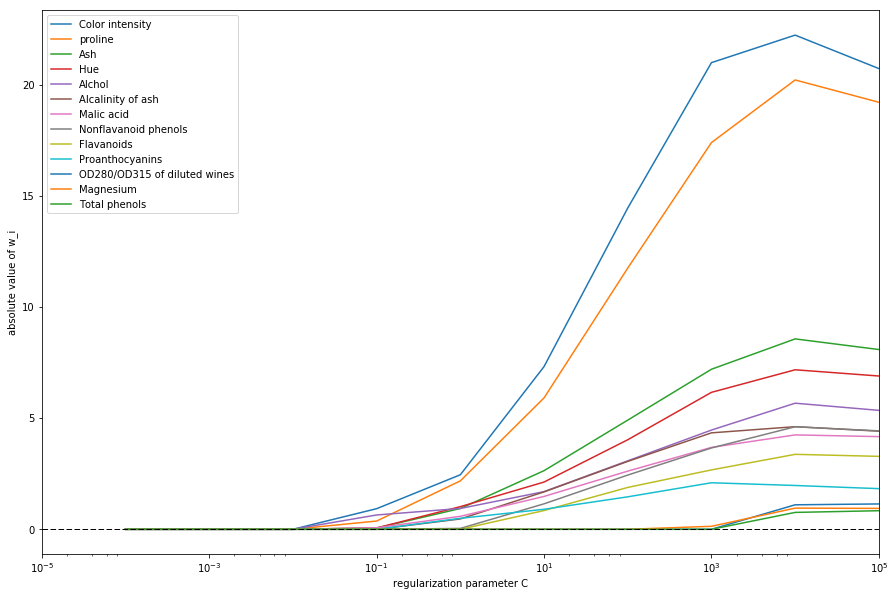

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

weights, params = [], []
for c in np.arange(-4.0, 6.0):
    lr = LogisticRegression(penalty = "l1", C = 10**c, random_state = 0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

w_abs = np.abs(weights)

plt.figure(figsize = (15, 10))

feat_labels = df_wine.columns[1:]

indices = np.argsort(np.mean(w_abs, axis = 0))[::-1]
for i in indices:
    plt.plot(params, w_abs[:,i], label = feat_labels[i])

plt.axhline(0, color = "black", linestyle = "--", linewidth = 1)
plt.xlim([10**(-5), 10**5])
plt.ylabel("absolute value of w_i")
plt.xlabel("regularization parameter C")
plt.xscale("log")
plt.legend()
plt.show()

In [21]:
# random forestでfeature selection
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10000, random_state = 0, n_jobs = 1)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10000, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [22]:
forest.feature_importances_

array([ 0.10658906,  0.02539968,  0.01391619,  0.03203319,  0.02207807,
        0.0607176 ,  0.15094795,  0.01464516,  0.02235112,  0.18248262,
        0.07824279,  0.1319868 ,  0.15860977])

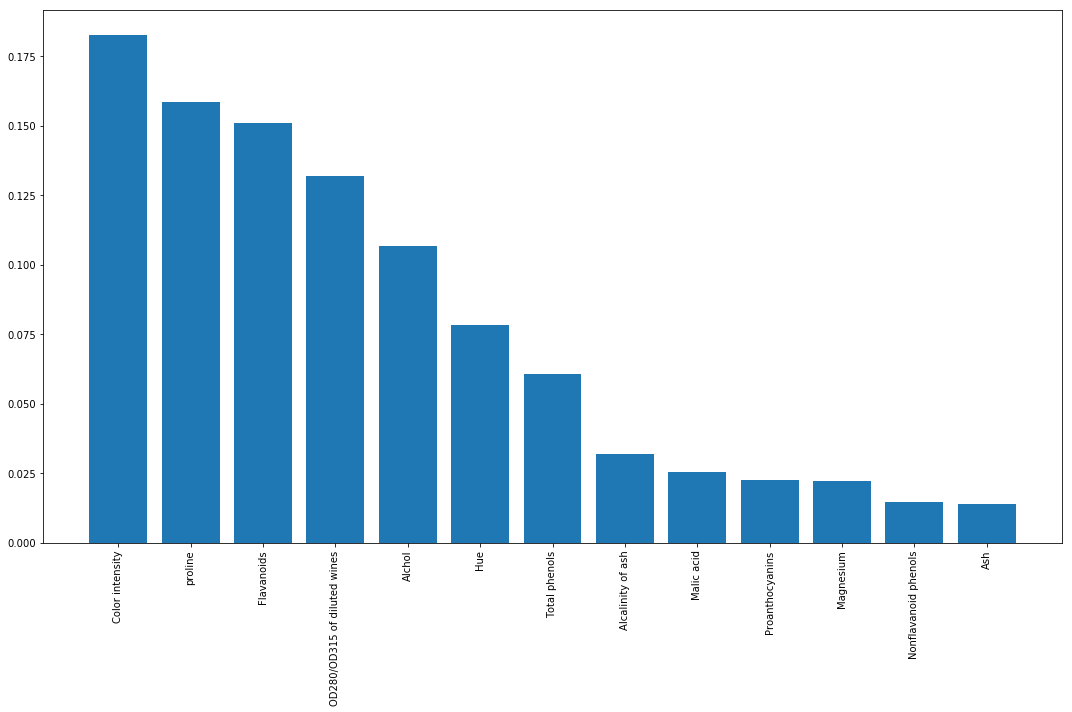

In [23]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize = (15, 10))
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation = 90)
plt.tight_layout()
plt.show()